In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-sales-2001-2020/Real_Estate_Sales_2001-2020_GL.xlsx


In [2]:
import os;
os.listdir('/kaggle/input/real-estate-sales-2001-2020')

['Real_Estate_Sales_2001-2020_GL.xlsx']

In [3]:
import pandas as pd

# Define the path to the Excel file
file_path = '/kaggle/input/real-estate-sales-2001-2020/Real_Estate_Sales_2001-2020_GL.xlsx'

# Load the Excel file into a Pandas DataFrame
data = pd.read_excel(file_path, nrows=1000)
data.head()


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,2020-02-10 00:00:00,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,2021-09-03 00:00:00,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,2021-02-07 00:00:00,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [4]:
# Check what the data contains 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Serial Number     1000 non-null   int64  
 1   List Year         1000 non-null   int64  
 2   Date Recorded     1000 non-null   object 
 3   Town              1000 non-null   object 
 4   Address           1000 non-null   object 
 5   Assessed Value    1000 non-null   int64  
 6   Sale Amount       1000 non-null   float64
 7   Sales Ratio       1000 non-null   float64
 8   Property Type     889 non-null    object 
 9   Residential Type  769 non-null    object 
 10  Non Use Code      213 non-null    object 
 11  Assessor Remarks  174 non-null    object 
 12  OPM remarks       30 non-null     object 
 13  Location          342 non-null    object 
dtypes: float64(2), int64(3), object(9)
memory usage: 109.5+ KB
None


In [5]:
# Get Summary of Numeric Data
print(data.describe())

       Serial Number    List Year  Assessed Value   Sale Amount  Sales Ratio
count   1.000000e+03  1000.000000    1.000000e+03  1.000000e+03  1000.000000
mean    2.592172e+06  2017.931000    2.906458e+05  5.006568e+05     0.753742
std     1.912183e+07     5.860425    5.755098e+05  1.128447e+06     3.717413
min     1.000100e+04  2001.000000    0.000000e+00  0.000000e+00     0.000000
25%     2.089275e+04  2020.000000    9.843750e+04  1.750000e+05     0.478950
50%     2.002340e+05  2020.000000    1.565900e+05  2.850000e+05     0.557450
75%     2.007682e+05  2020.000000    2.622250e+05  4.805000e+05     0.647625
max     2.020001e+08  2020.000000    9.098880e+06  2.930000e+07   114.400000


In [6]:
# describe the Non_numeric Data "Property Types"
print(data['Property Type'].value_counts())

Property Type
Residential    769
Vacant Land     69
Commercial      43
Apartments       7
Industrial       1
Name: count, dtype: int64


In [7]:
# Check which columns have missing values
missing_values = data.isna().sum()
missing_values


Serial Number         0
List Year             0
Date Recorded         0
Town                  0
Address               0
Assessed Value        0
Sale Amount           0
Sales Ratio           0
Property Type       111
Residential Type    231
Non Use Code        787
Assessor Remarks    826
OPM remarks         970
Location            658
dtype: int64

In [8]:
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,2020-02-10 00:00:00,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,2021-09-03 00:00:00,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,2021-02-07 00:00:00,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


### Data Cleaning 

In [9]:
# Drop multiple columns, including 'Location', and assign the result to a new DataFrame
cleaned_data = data.drop(['Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Location'], axis=1)
cleaned_data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN
1,20002,2020,2020-02-10 00:00:00,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family
2,200212,2020,2021-09-03 00:00:00,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family
4,200377,2020,2021-02-07 00:00:00,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family


In [10]:
# Fill the missing values in the Residential Type(RT) column
# Start by checking the most common one to use for replacement of the nulls
RT_counts = cleaned_data['Residential Type'].value_counts()
most_common_RT =RT_counts.idxmax()
most_common_RT

'Single Family'

In [11]:
# Filling the Nulls in the residetional Type Column
cleaned_data['Residential Type'] = cleaned_data['Residential Type'].fillna("Single Family")
cleaned_data


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.463000,Commercial,Single Family
1,20002,2020,2020-02-10 00:00:00,Ashford,390 TURNPIKE RD,253000,430000.0,0.588300,Residential,Single Family
2,200212,2020,2021-09-03 00:00:00,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.724800,Residential,Condo
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.695800,Residential,Single Family
4,200377,2020,2021-02-07 00:00:00,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.595700,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
995,20435,2020,03/23/2021,East Hartford,207 MAIN ST,94070,191000.0,0.492513,Residential,Single Family
996,200170,2020,01/28/2021,Avon,88 NEW ROAD,198700,322000.0,0.617000,Residential,Single Family
997,20852,2020,2021-08-06 00:00:00,Hartford,820 PROSPECT AVE,211718,9000.0,23.524200,Residential,Single Family
998,200163,2020,2021-05-04 00:00:00,East Haddam,MAPLE AVE,2970,67000.0,0.044300,Vacant Land,Single Family


In [12]:
# Check the most common category in the 'Residential Type' column
residential_type_counts = cleaned_data['Residential Type'].value_counts()
most_common_residential_type = residential_type_counts.idxmax()

print("Most Common Residential Type:", most_common_residential_type)

Most Common Residential Type: Single Family


In [13]:
# Replace missing values in 'Residential Type' with "Single Family"
cleaned_data['Residential Type'] = cleaned_data['Residential Type'].fillna("Single Family")
cleaned_data


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.463000,Commercial,Single Family
1,20002,2020,2020-02-10 00:00:00,Ashford,390 TURNPIKE RD,253000,430000.0,0.588300,Residential,Single Family
2,200212,2020,2021-09-03 00:00:00,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.724800,Residential,Condo
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.695800,Residential,Single Family
4,200377,2020,2021-02-07 00:00:00,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.595700,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
995,20435,2020,03/23/2021,East Hartford,207 MAIN ST,94070,191000.0,0.492513,Residential,Single Family
996,200170,2020,01/28/2021,Avon,88 NEW ROAD,198700,322000.0,0.617000,Residential,Single Family
997,20852,2020,2021-08-06 00:00:00,Hartford,820 PROSPECT AVE,211718,9000.0,23.524200,Residential,Single Family
998,200163,2020,2021-05-04 00:00:00,East Haddam,MAPLE AVE,2970,67000.0,0.044300,Vacant Land,Single Family


## Exploratory Data Analysis (EDA)

In [14]:
# Get an overview of the data types, missing values
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Serial Number     1000 non-null   int64  
 1   List Year         1000 non-null   int64  
 2   Date Recorded     1000 non-null   object 
 3   Town              1000 non-null   object 
 4   Address           1000 non-null   object 
 5   Assessed Value    1000 non-null   int64  
 6   Sale Amount       1000 non-null   float64
 7   Sales Ratio       1000 non-null   float64
 8   Property Type     889 non-null    object 
 9   Residential Type  1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [15]:
# Get an overview of  basic statistics for numeric columns
cleaned_data.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,2.592172e+06,2017.931000,2.906458e+05,5.006568e+05,0.753742
std,1.912183e+07,5.860425,5.755098e+05,1.128447e+06,3.717413
min,1.000100e+04,2001.000000,0.000000e+00,0.000000e+00,0.000000
25%,2.089275e+04,2020.000000,9.843750e+04,1.750000e+05,0.478950
50%,2.002340e+05,2020.000000,1.565900e+05,2.850000e+05,0.557450
75%,2.007682e+05,2020.000000,2.622250e+05,4.805000e+05,0.647625
max,2.020001e+08,2020.000000,9.098880e+06,2.930000e+07,114.400000


In [16]:
# Convert the date columns into numerical representation
cleaned_data['Date Recorded'] = pd.to_datetime(cleaned_data['Date Recorded']).dt.strftime('%Y%m%d').astype(int)
cleaned_data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,20210913,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,Single Family
1,20002,2020,20200210,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family
2,200212,2020,20210903,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo
3,200243,2020,20210413,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family
4,200377,2020,20210207,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family


In [17]:
# Specify a list of column names to one-hot encode
categorical_columns = ['Town', 'Property Type', 'Residential Type']  # Add all relevant categorical columns to this list

# Perform one-hot encoding for all specified columns
cleaned_data = pd.get_dummies(cleaned_data, columns=categorical_columns, prefix=categorical_columns, drop_first=True)


In [18]:
cleaned_data.head()

,Serial Number,List Year,Date Recorded,Address,Assessed Value,Sale Amount,Sales Ratio,Town_Ansonia,Town_Ashford,Town_Avon,...,Town_Woodbury,Town_Woodstock,Property Type_Commercial,Property Type_Industrial,Property Type_Residential,Property Type_Vacant Land,Residential Type_Four Family,Residential Type_Single Family,Residential Type_Three Family,Residential Type_Two Family
0,2020348,2020,20210913,230 WAKELEE AVE,150500,325000.0,0.4630,True,False,False,...,False,False,True,False,False,False,False,True,False,False
1,20002,2020,20200210,390 TURNPIKE RD,253000,430000.0,0.5883,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,200212,2020,20210903,5 CHESTNUT DRIVE,130400,179900.0,0.7248,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,200243,2020,20210413,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,False,False,True,...,False,False,False,False,True,False,False,True,False,False
4,200377,2020,20210207,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,False,False,True,...,False,False,False,False,True,False,False,True,False,False


In [19]:
# Drop the "Address" column
cleaned_data 

,Serial Number,List Year,Date Recorded,Address,Assessed Value,Sale Amount,Sales Ratio,Town_Ansonia,Town_Ashford,Town_Avon,...,Town_Woodbury,Town_Woodstock,Property Type_Commercial,Property Type_Industrial,Property Type_Residential,Property Type_Vacant Land,Residential Type_Four Family,Residential Type_Single Family,Residential Type_Three Family,Residential Type_Two Family
0,2020348,2020,20210913,230 WAKELEE AVE,150500,325000.0,0.463000,True,False,False,...,False,False,True,False,False,False,False,True,False,False
1,20002,2020,20200210,390 TURNPIKE RD,253000,430000.0,0.588300,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,200212,2020,20210903,5 CHESTNUT DRIVE,130400,179900.0,0.724800,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,200243,2020,20210413,111 NORTHINGTON DRIVE,619290,890000.0,0.695800,False,False,True,...,False,False,False,False,True,False,False,True,False,False
4,200377,2020,20210207,70 FAR HILLS DRIVE,862330,1447500.0,0.595700,False,False,True,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20435,2020,20210323,207 MAIN ST,94070,191000.0,0.492513,False,False,False,...,False,False,False,False,True,False,False,True,False,False
996,200170,2020,20210128,88 NEW ROAD,198700,322000.0,0.617000,False,False,True,...,False,False,False,False,True,False,False,True,False,False
997,20852,2020,20210806,820 PROSPECT AVE,211718,9000.0,23.524200,False,False,False,...,False,False,False,False,True,False,False,True,False,False
998,200163,2020,20210504,MAPLE AVE,2970,67000.0,0.044300,False,False,False,...,False,False,False,False,False,True,False,True,False,False


**Visualization of the relationship between features**

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


IndexError: index 5 is out of bounds for axis 0 with size 5

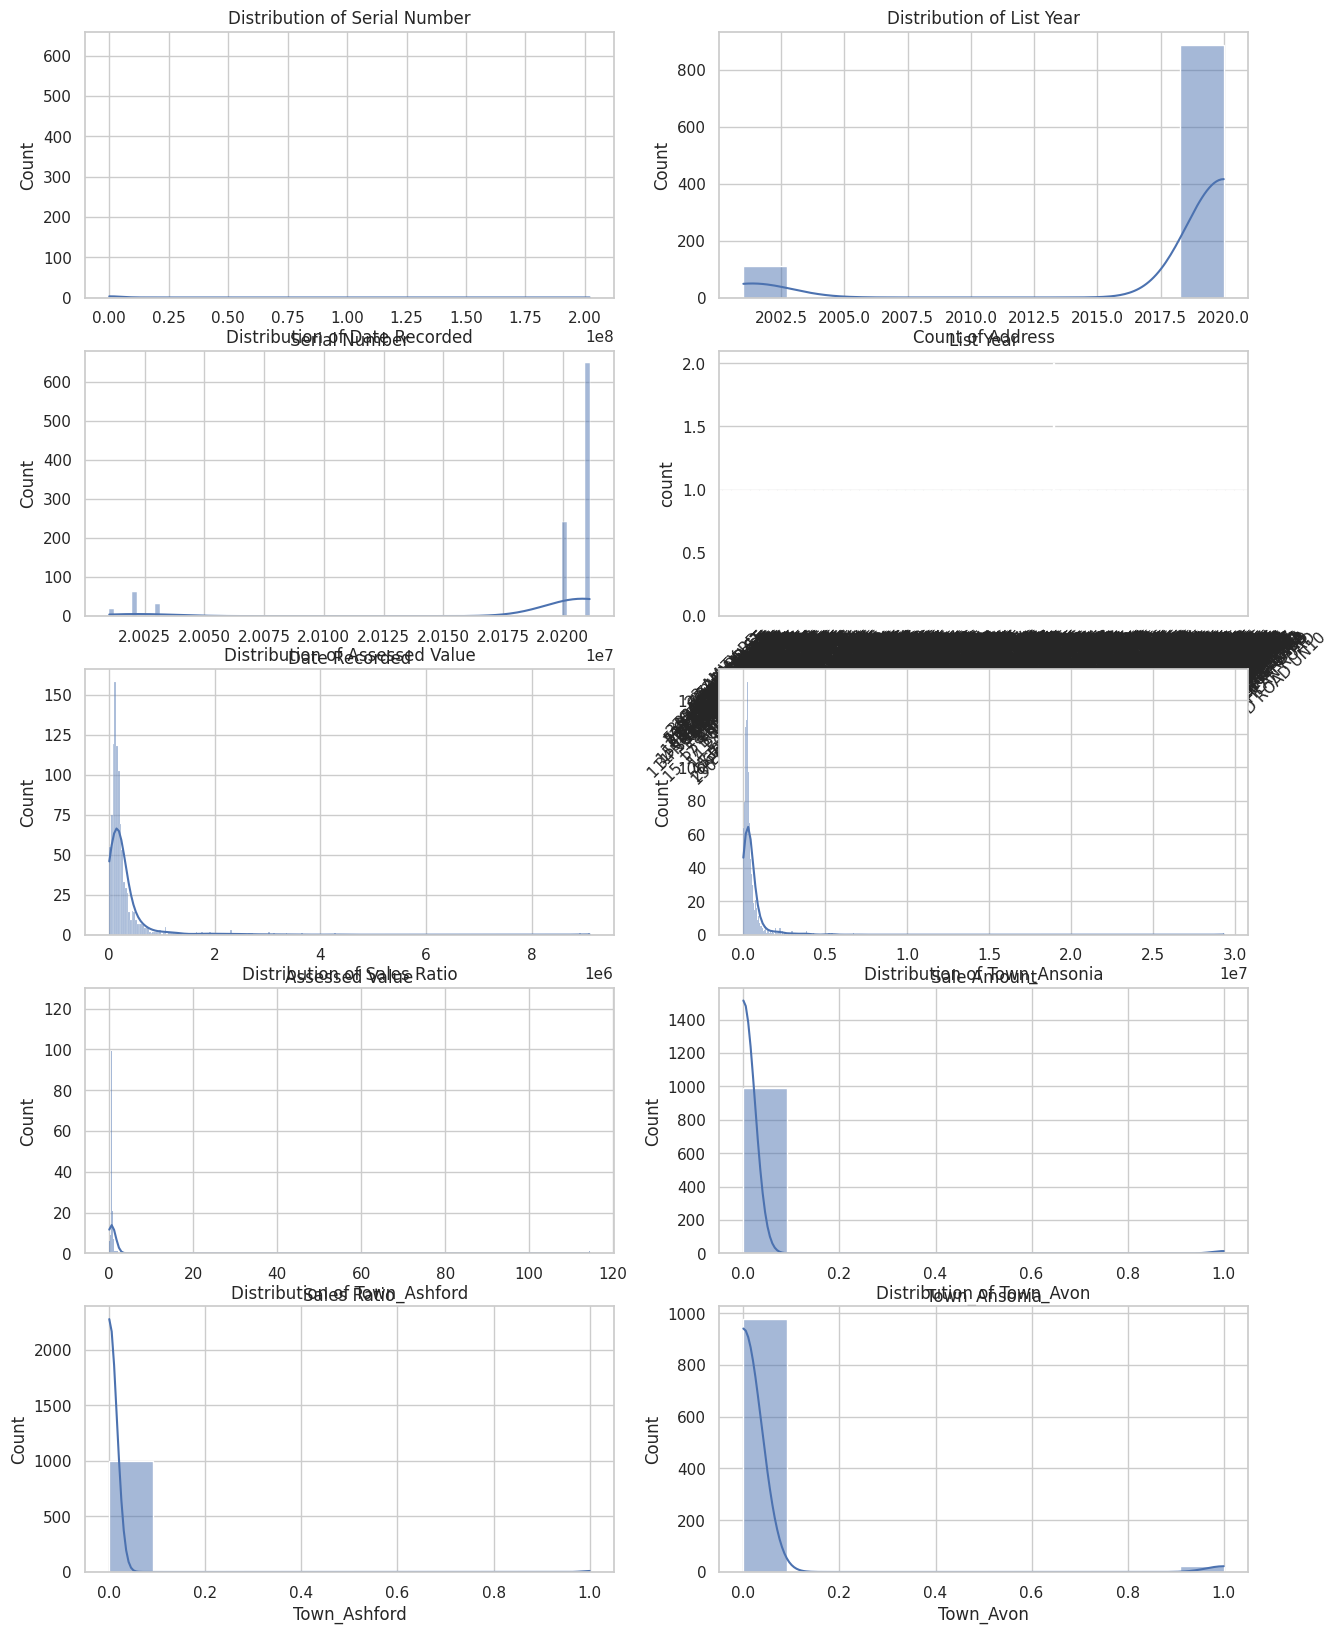

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Reset warning settings (optional)
warnings.filterwarnings("default")


# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for the visualizations
fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # Adjust the number of rows and columns as needed

# Iterate through the columns in the dataset
for i, column in enumerate(cleaned_data.columns):
    if cleaned_data[column].dtype == 'object':
        # Categorical features: Create a bar chart
        sns.countplot(x=column, data=cleaned_data, ax=axes[i // 2, i % 2])
        axes[i // 2, i % 2].set_title(f'Count of {column}')
        axes[i // 2, i % 2].set_xticklabels(axes[i // 2, i % 2].get_xticklabels(), rotation=45)
    else:
        # Numerical features: Create a histogram
        sns.histplot(cleaned_data[column], kde=True, ax=axes[i // 2, i % 2])
        axes[i // 2, i % 2].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()

# Display the visualizations
plt.show()

**Observations**

- The dataset primarily consists of residential properties, with the majority having lower assessed values and sale amounts.
- There are potential outliers with exceptionally high assessed values and sale amounts, indicating some properties with significant values.
- A positive correlation is observed between assessed value and sale amount, suggesting that higher assessed values generally correspond to higher sale prices.
- The data distribution reveals a concentration of properties with lower values, with a few high-value outliers.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the main columns of interest
main_columns = cleaned_data[['Assessed Value', 'Sale Amount', 'Sales Ratio']]

# Calculate the correlation matrix for the selected columns
correlation_matrix = main_columns.corr()

# Create a custom heatmap
plt.figure(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # Choose a color palette
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, center=0)
plt.title("Correlation Heatmap of Main Columns")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()


In [ ]:
cleaned_data.head()

## Simple Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming you have your data in a DataFrame called `cleaned_data`

# Select the independent variable (X) and dependent variable (Y)
X = cleaned_data[['Assessed Value']]
Y = cleaned_data['Sale Amount']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)
# Make predictions on the test set
Y_pred = model.predict(X_test)

In [ ]:
import statsmodels.api as sm

# Assuming you have X and Y defined as follows:
X = cleaned_data[['Assessed Value']]
Y = cleaned_data['Sale Amount']

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary
print(model.summary())

**Comments**
R-squared (R²): The R-squared value indicates the goodness of fit of the model. In your case, R² is 0.698, suggesting that approximately 69.8% of the variance in the "Sale Amount" can be explained by the "Assessed Value."

Adjusted R-squared (Adj. R²): This is a modified version of R-squared that considers the number of predictors in the model. Your Adj. R² is also 0.698.

Coefficients: The coefficients section provides information about the intercept (const) and the coefficient for "Assessed Value." In this case, the coefficient for "Assessed Value" is approximately 1.6380. This means that for every one-unit increase in "Assessed Value," the "Sale Amount" is expected to increase by approximately 1.6380 units.

P-values (P>|t|): The p-value associated with each coefficient tests the null hypothesis that the corresponding coefficient is equal to zero (i.e., it has no effect on the dependent variable). In this summary, the p-value for "Assessed Value" is very close to zero (0.000), 

## Multiple Linear Regression Model

In [ ]:
# Define the features (independent variables) and the target (dependent variable)
X = cleaned_data[['Assessed Value', 'Property Type_Commercial', 'Property Type_Residential']]
Y = cleaned_data['Sale Amount']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate and print model performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Optionally, you can print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


## Based on the data and the analysis conducted, here are some key conclusions:

Dataset Overview: The dataset contains information about property assessments, sale amounts, property types, and other related attributes. It consists of both numerical and categorical data.

Data Cleaning: The initial data required cleaning to handle missing values and format issues. You performed data cleaning to make it suitable for analysis.

Exploratory Data Analysis (EDA): During the EDA phase, you visualized the data, which included creating histograms, box plots, scatter plots, and bar charts. Some insights include:

The Assessed Value and Sale Amount distributions.
The impact of property types on Sale Amount.
Relationships between Assessed Value and Sale Amount.
Correlation Analysis: A correlation matrix and heatmap were used to identify relationships between variables. The analysis revealed some degree of correlation between the variables, indicating that Assessed Value had a significant impact on Sale Amount.

Regression Analysis: Simple linear regression was performed to predict Sale Amount based on Assessed Value. A multiple linear regression model was also created, considering Assessed Value and property types (Commercial and Residential). The results of the multiple linear regression model suggest that there might be issues with the model fit, overfitting, or multicollinearity due to the negative R-squared and very high coefficients.

Model Interpretation: The coefficients in the regression models provide insight into the relationships between independent variables and Sale Amount. For example, an increase in Assessed Value tends to increase Sale Amount, while certain property types (Commercial and Residential) have negative impacts on Sale Amount.

Model Evaluation: The model's performance was assessed using metrics like Mean Squared Error (MSE) and R-squared (R2). An unusually high MSE and a negative R2 in the multiple linear regression model indicate potential issues with the model's predictive capability.

**Conclusion**: In conclusion, while the analysis provides some initial insights into the relationships between variables, it's essential to address the issues identified in the regression analysis. Further steps may include refining the model, exploring additional variables, and considering interactions and transformations to improve the predictive accuracy. Additionally, more data and domain-specific knowledge could help enhance the model's performance.

Next Steps: Further investigation, model refinement, and validation are recommended to develop a more reliable predictive model for Sale Amount.